In [208]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

np.set_printoptions(precision=3, suppress=True)

In [209]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [210]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

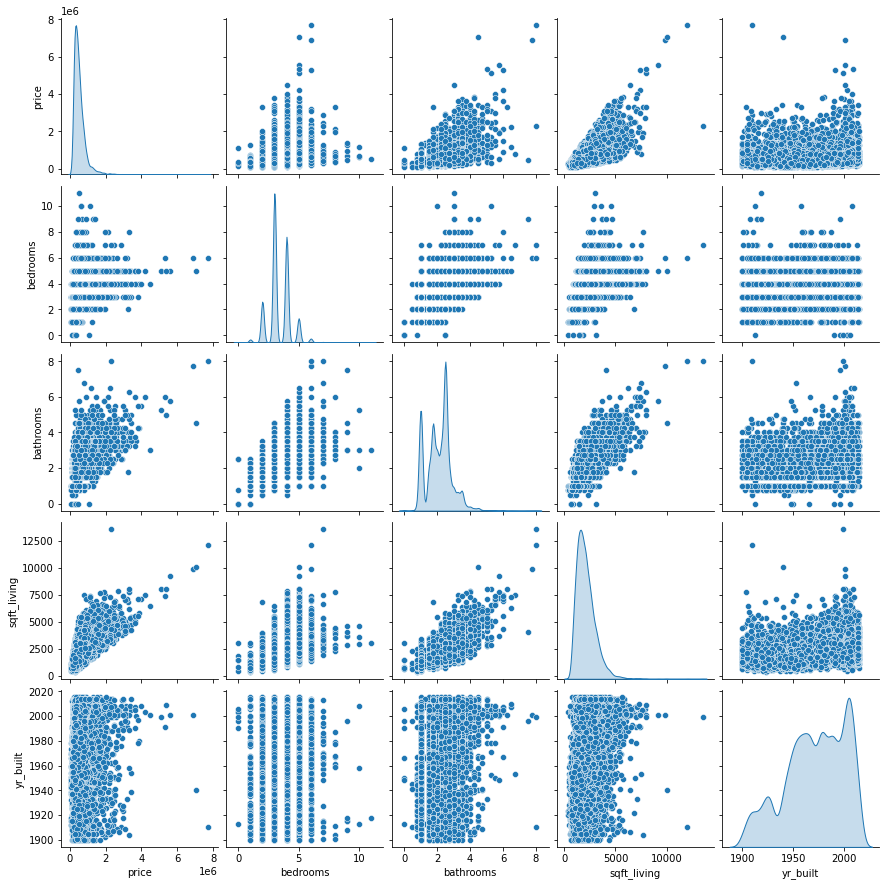

In [211]:
sns.pairplot(train_dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built']], diag_kind = "kde")

<AxesSubplot:>

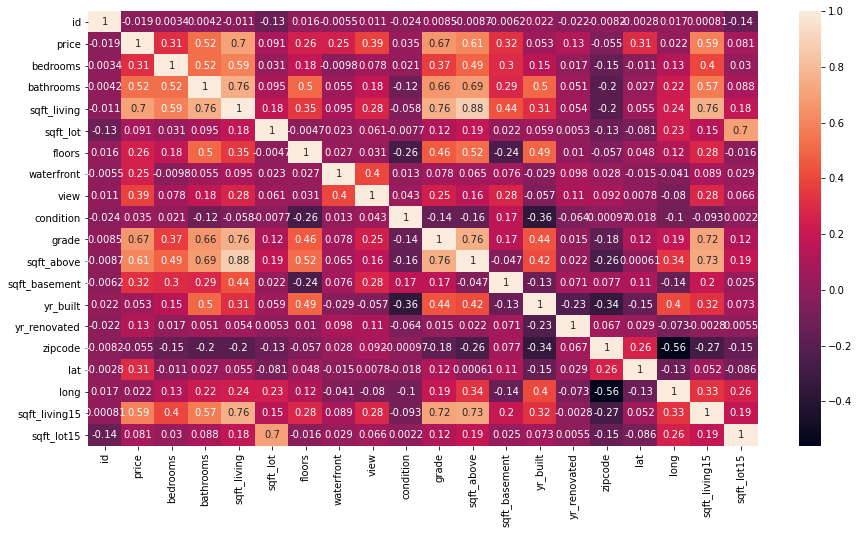

In [212]:
plt.figure(figsize = (15,8))
sns.heatmap(train_dataset.corr(), annot=True)

In [213]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
id,17290.0,4.574797e+09,2.878860e+09,1.200019e+06,2.115510e+09,3.897100e+09,7.308825e+09,9.900000e+09
bedrooms,17290.0,3.373684e+00,9.045046e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
bathrooms,17290.0,2.113924e+00,7.669899e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,17290.0,2.081447e+03,9.210163e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,17290.0,1.511112e+04,4.036823e+04,5.200000e+02,5.040000e+03,7.620000e+03,1.066325e+04,1.164794e+06
floors,17290.0,1.493667e+00,5.399509e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,17290.0,7.634471e-03,8.704380e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,17290.0,2.380567e-01,7.737285e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,17290.0,3.408502e+00,6.510291e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,17290.0,7.658531e+00,1.178891e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [214]:
train_labels = train_dataset.pop("price")
test_labels = test_dataset.pop("price")

In [215]:
def standarize(x):
    return (x - train_stats['mean']) / train_stats['std']

standarized_train_data = standarize(train_dataset)
standarized_test_data = standarize(test_dataset)

In [216]:
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [217]:
def train_model(model, df, train_labels, feature, label, epochs, batch_size):
    history = model.fit(x = df[feature],
                        y = train_labels,
                        batch_size = batch_size,
                        epochs = epochs)
    
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse

In [218]:
def plot_the_model(labels, trained_weight, trained_bias, feature, label):
    plt.xlabel(feature)
    plt.ylabel(label)
    
    random_examples = train_dataset.sample(n = 250)
    plt.scatter(random_examples[feature], labels[random_examples.index])
    
    x0, y0, x1 = 0, trained_bias, 8000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c = 'r')
    plt.show()

In [219]:
def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label = "Loss")
    plt.legend()
    plt.ylim([rmse.min() * 0.97, rmse.max()])
    plt.show()

In [228]:
def predict_house_price(my_model, test_data, test_labels, feature, label):
    batch = test_data[feature]
    predicted_values = my_model.predict_on_batch(x = batch)
    print("sqft_living", "price", "predicted_price")
    for i, ((key, v), (key1, v1)) in enumerate(zip(test_data[feature].items(), test_labels.items())):
        print(v, v1, predicted_values[i][0])

Epoch 1/150
385/385 [==============================] - 0s 1ms/step - loss: 425040969728.0000 - root_mean_squared_error: 651951.6875
Epoch 2/150
385/385 [==============================] - 0s 1ms/step - loss: 417023262720.0000 - root_mean_squared_error: 645773.3750
Epoch 3/150
385/385 [==============================] - 0s 956us/step - loss: 408970264576.0000 - root_mean_squared_error: 639507.8125
Epoch 4/150
385/385 [==============================] - 0s 956us/step - loss: 401065934848.0000 - root_mean_squared_error: 633297.6875
Epoch 5/150
385/385 [==============================] - 0s 914us/step - loss: 393294118912.0000 - root_mean_squared_error: 627131.6875
Epoch 6/150
385/385 [==============================] - 0s 833us/step - loss: 385619984384.0000 - root_mean_squared_error: 620983.0625
Epoch 7/150
385/385 [==============================] - 0s 852us/step - loss: 377945194496.0000 - root_mean_squared_error: 614772.5000
Epoch 8/150
385/385 [==============================] - 0s 852us/st

385/385 [==============================] - 0s 831us/step - loss: 107565064192.0000 - root_mean_squared_error: 327971.1250
Epoch 62/150
385/385 [==============================] - 0s 853us/step - loss: 105094963200.0000 - root_mean_squared_error: 324183.5312
Epoch 63/150
385/385 [==============================] - 0s 831us/step - loss: 102775914496.0000 - root_mean_squared_error: 320586.8438
Epoch 64/150
385/385 [==============================] - 0s 831us/step - loss: 100545208320.0000 - root_mean_squared_error: 317088.6562
Epoch 65/150
385/385 [==============================] - 0s 853us/step - loss: 98379382784.0000 - root_mean_squared_error: 313654.9062
Epoch 66/150
385/385 [==============================] - 0s 831us/step - loss: 96276660224.0000 - root_mean_squared_error: 310284.8438
Epoch 67/150
385/385 [==============================] - 0s 833us/step - loss: 94380908544.0000 - root_mean_squared_error: 307214.7500
Epoch 68/150
385/385 [==============================] - 0s 831us/step -

385/385 [==============================] - 0s 831us/step - loss: 70009659392.0000 - root_mean_squared_error: 264593.3750
Epoch 123/150
385/385 [==============================] - 0s 831us/step - loss: 70007300096.0000 - root_mean_squared_error: 264588.9375
Epoch 124/150
385/385 [==============================] - 0s 810us/step - loss: 70005145600.0000 - root_mean_squared_error: 264584.8438
Epoch 125/150
385/385 [==============================] - 0s 810us/step - loss: 70003875840.0000 - root_mean_squared_error: 264582.4688
Epoch 126/150
385/385 [==============================] - 0s 837us/step - loss: 70002368512.0000 - root_mean_squared_error: 264579.5938
Epoch 127/150
385/385 [==============================] - 0s 825us/step - loss: 70001803264.0000 - root_mean_squared_error: 264578.5312
Epoch 128/150
385/385 [==============================] - 0s 831us/step - loss: 70001270784.0000 - root_mean_squared_error: 264577.5312
Epoch 129/150
385/385 [==============================] - 0s 810us/ste

C:\Users\Cyprian\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


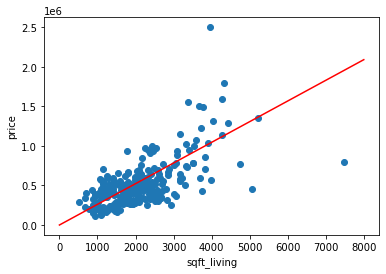

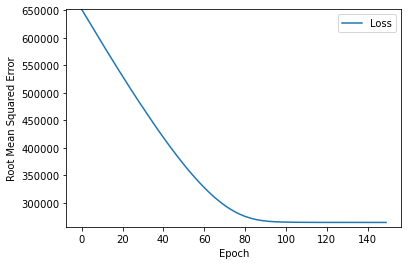

sqft_living price predicted_price
3560 662500.0 930695.3
1370 400000.0 358324.3
1250 230000.0 326961.53
1520 438000.0 397527.8
2570 625000.0 671952.25
1570 685000.0 410595.62
1410 600000.0 368778.6
1980 585000.0 517751.84
2830 885000.0 739905.0
2519 505000.0 658623.06
1540 549000.0 402754.94
1000 204000.0 261622.38
2380 360000.0 622294.5
3430 832500.0 896718.94
1040 480000.0 272076.66
3450 720000.0 901946.06
2350 390000.0 614453.8
1900 360000.0 496843.3
2020 355000.0 528206.1
3520 1099880.0 920241.06
1580 430000.0 413209.22
3300 905000.0 862742.56
1160 199000.0 303439.44
2320 437500.0 606613.1
2070 850830.0 541274.0
1980 555000.0 517751.84
1210 290000.0 316507.25
2340 375000.0 611840.25
1670 460000.0 436731.3
1240 188500.0 324347.97
3140 680000.0 820925.5
2310 597750.0 603999.56
1590 518500.0 415822.78
2400 660000.0 627521.6
2100 445000.0 549114.7
2320 822500.0 606613.1
2010 660500.0 525592.56
1320 199000.0 345256.5
2020 220000.0 528206.1
1170 519950.0 306053.0
2820 527700.0 737291.44


3110 719000.0 813084.8
1180 193000.0 308666.56
2090 299500.0 546501.1
1260 242000.0 329575.1
1590 280000.0 415822.78
2220 580000.0 580477.44
1600 562000.0 418436.34
2950 992000.0 771267.75
1240 305500.0 324347.97
850 233000.0 222418.89
2320 737500.0 606613.1
1960 355950.0 512524.72
1290 265000.0 337415.78
3655 740000.0 955524.2
1980 332000.0 517751.84
1660 290000.0 434117.72
1080 550000.0 282530.9
1350 335000.0 353097.2
1320 339950.0 345256.5
2400 280000.0 627521.6
2400 300000.0 627521.6
1220 390000.0 319120.84
2690 608000.0 703315.06
1010 225000.0 264235.94
1400 537000.0 366165.03
3200 490000.0 836606.94
1830 336800.0 478548.34
2460 646000.0 643203.06
1030 175000.0 269463.06
2310 785000.0 603999.56
1790 493000.0 468094.1
3900 1620000.0 1019556.56
2660 603500.0 695474.4
1140 695000.0 298212.3
1710 675000.0 447185.56
980 134000.0 256395.25
1440 375000.0 376619.28
2070 337500.0 541274.0
1890 1065000.0 494229.75
1920 352500.0 502070.44
1870 259000.0 489002.62
900 205500.0 235486.72
1850 5

2090 385000.0 546501.1
1590 599000.0 415822.78
1860 860000.0 486389.06
2500 450000.0 653657.3
2220 490000.0 580477.44
2430 335000.0 635362.4
1670 550000.0 436731.3
1580 233500.0 413209.22
1230 400000.0 321734.4
2570 519000.0 671952.25
3220 430000.0 841834.06
2150 419950.0 562182.5
2500 455000.0 653657.3
2170 439950.0 567409.6
2160 798750.0 564796.06
950 320000.0 248554.55
4140 1060000.0 1082282.1
1500 576000.0 392300.7
2641 324950.0 690508.56
1730 459000.0 452412.7
1070 195000.0 279917.34
1040 440000.0 272076.66
970 515000.0 253781.69
1110 600000.0 290371.6
1850 670000.0 483775.5
2060 731100.0 538660.4
2130 435000.0 556955.4
2020 740000.0 528206.1
3060 475000.0 800017.0
1760 469950.0 460253.4
1680 350000.0 439344.88
1440 803000.0 376619.28
3910 961500.0 1022170.1
1400 267000.0 366165.03
2300 619000.0 601386.0
1560 422500.0 407982.06
1630 800000.0 426277.03
4750 1309500.0 1241709.6
3660 730000.0 956830.94
2200 300000.0 575250.3
1320 447000.0 345256.5
2160 650000.0 564796.06
3140 529888.

3070 529000.0 802630.56
2160 670000.0 564796.06
1400 285000.0 366165.03
3090 1112750.0 807857.7
2440 620000.0 637975.94
1000 725000.0 261622.38
2160 355000.0 564796.06
1490 258000.0 389687.12
1690 295000.0 441958.44
2130 762000.0 556955.4
1360 450000.0 355710.75
1010 340000.0 264235.94
1810 216000.0 473321.22
1670 245000.0 436731.3
2670 925000.0 698087.94
1750 626000.0 457639.8
2050 535500.0 536046.8
4170 810000.0 1090122.8
2230 305000.0 583091.0
750 258000.0 196283.23
1610 345000.0 421049.9
790 375000.0 206737.5
2100 480000.0 549114.7
1660 658000.0 434117.72
2310 407450.0 603999.56
1480 276000.0 387073.53
3080 440000.0 805244.1
1700 585000.0 444572.0
3160 1150000.0 826152.7
2500 575000.0 653657.3
1240 400000.0 324347.97
2130 325000.0 556955.4
2020 245000.0 528206.1
1230 440000.0 321734.4
2720 580000.0 711155.75
2230 325000.0 583091.0
2230 1035000.0 583091.0
1740 280000.0 455026.25
2290 685900.0 598772.44
920 265000.0 240713.84
2120 597000.0 554341.8
1050 540000.0 274690.22
2440 725000

1790 410000.0 468094.1
1020 385000.0 266849.5
1440 495000.0 376619.28
2250 342000.0 588318.2
2070 645000.0 541274.0
3810 1700000.0 996034.44
1540 850000.0 402754.94
1840 366000.0 481161.9
860 245000.0 225032.45
1650 369500.0 431504.16
2670 370000.0 698087.94
2360 445000.0 617067.4
2330 465000.0 609226.7
2140 640000.0 559568.94
3100 759950.0 810471.25
790 198000.0 206737.5
2040 730000.0 533433.25
2560 650000.0 669338.7
1590 783200.0 415822.78
2010 472217.0 525592.56
1120 549995.0 292985.16
3550 959900.0 928081.75
1880 562000.0 491616.2
4350 472000.0 1137167.0
3290 799000.0 860129.0
2080 267500.0 543887.56
1790 338000.0 468094.1
2460 563225.0 643203.06
1240 645000.0 324347.97
2530 435000.0 661498.0
1170 250000.0 306053.0
1790 304500.0 468094.1
1920 417000.0 502070.44
1370 547000.0 358324.3
2240 300000.0 585704.56
2190 269100.0 572636.75
990 402500.0 259008.81
2920 795000.0 763427.06
2300 420000.0 601386.0
2820 456700.0 737291.44
2370 420000.0 619680.94
1090 392000.0 285144.47
1950 360000

730 316000.0 191056.1
1240 559000.0 324347.97
2290 481000.0 598772.44
1440 589500.0 376619.28
4190 2546000.0 1095349.9
1850 260000.0 483775.5
1340 466200.0 350483.62
2180 545000.0 570023.2
1820 605000.0 475934.78
1170 370000.0 306053.0
1460 580000.0 381846.4
1380 322000.0 360937.88
1460 162000.0 381846.4
1360 328000.0 355710.75
2030 246000.0 530819.7
1490 271000.0 389687.12
1060 435000.0 277303.78
2320 600000.0 606613.1
2040 417000.0 533433.25
1850 678100.0 483775.5
1352 325000.0 353619.9
1930 385000.0 504684.0
2910 1100000.0 760813.5
1330 375000.0 347870.06
1000 200000.0 261622.38
3560 860000.0 930695.3
1140 234300.0 298212.3
1820 525000.0 475934.78
1510 698000.0 394914.25
1720 313100.0 449799.12
1170 185000.0 306053.0
1140 455000.0 298212.3
1830 240000.0 478548.34
6380 1822500.0 1667720.9
1690 452000.0 441958.44
2660 765000.0 695474.4
1880 538000.0 491616.2
2240 790000.0 585704.56
2540 696500.0 664111.56
1370 276000.0 358324.3
7880 2415000.0 2059755.8
2970 829000.0 776494.94
3160 697

2160 753000.0 564796.06
3170 1600000.0 828766.25
1830 321000.0 478548.34
1520 288000.0 397527.8
1240 248500.0 324347.97
2380 330000.0 622294.5
1690 267000.0 441958.44
1470 420000.0 384459.97
1776 620000.0 464435.1
1900 869000.0 496843.3
2590 890000.0 677179.4
4430 875000.0 1158075.5
4010 1387000.0 1048305.75
3260 650000.0 852288.3
830 275000.0 217191.75
1040 580000.0 272076.66
1380 230000.0 360937.88
1250 318000.0 326961.53
1470 525000.0 384459.97
890 250000.0 232873.16
2420 400000.0 632748.75
3680 935000.0 962058.06
1210 395000.0 316507.25
1180 330000.0 308666.56
700 225000.0 183215.4
2640 570000.0 690247.25
2330 630000.0 609226.7
2830 779000.0 739905.0
1340 530000.0 350483.62
640 340000.0 167534.0
1460 544000.0 381846.4
1010 315000.0 264235.94
1200 227000.0 313893.7
5810 1875000.0 1518747.6
1480 600000.0 387073.53
840 202000.0 219805.33
3140 810000.0 820925.5
770 197000.0 201510.36
1460 405000.0 381846.4
1850 305500.0 483775.5
2060 269000.0 538660.4
1500 431000.0 392300.7
3270 735000

1940 423800.0 507297.6
1830 434000.0 478548.34
1820 393000.0 475934.78
1060 400000.0 277303.78
3050 890000.0 797403.44
1890 430000.0 494229.75
2370 735000.0 619680.94
2180 279000.0 570023.2
2700 935000.0 705928.6
1240 699999.0 324347.97
1960 535000.0 512524.72
1670 325000.0 436731.3
2890 585000.0 755586.4
1940 359000.0 507297.6
960 374500.0 251168.11
1750 661000.0 457639.8
1330 539950.0 347870.06
1080 395000.0 282530.9
1780 270000.0 465480.53
2570 675000.0 671952.25
2730 981000.0 713769.3
1080 390000.0 282530.9
2320 555000.0 606613.1
3260 1550000.0 852288.3
1730 550000.0 452412.7
1660 655000.0 434117.72
1310 249900.0 342642.94
1280 190000.0 334802.22
1740 585000.0 455026.25
1100 174900.0 287758.03
2200 315000.0 575250.3
1410 272500.0 368778.6
1500 270000.0 392300.7
2380 342000.0 622294.5
1810 279000.0 473321.22
2550 850000.0 666725.1
3080 2160000.0 805244.1
3670 824000.0 959444.5
4460 1550000.0 1165916.1
1080 345000.0 282530.9
2390 770126.0 624908.06
2200 359000.0 575250.3
1420 535000.

2050 465000.0 536046.8
2110 747450.0 551728.25
980 329000.0 256395.25
2850 608500.0 745132.1
3070 785000.0 802630.56
4850 3567000.0 1267845.2
2780 594866.0 726837.1
2770 572000.0 724223.56
4170 1088000.0 1090122.8
3510 1007500.0 917627.5


In [229]:
learning_rate = 0.008
epochs = 150
batch_size = 45

my_feature = "sqft_living"
my_label = "price"

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, train_dataset, train_labels, my_feature, my_label, epochs, batch_size)

plot_the_model(train_labels, weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_price(my_model, test_dataset, test_labels, my_feature, my_label)